# Aplicación de la Visión de Máquina al Análisis de Imágenes de Resonancia Magnética con Contraste.
- Luis David Preciado Martínez
- Daniel Esteban Ramírez Chiquillo

## Primera Entrega
En esta primera entrega se realizará el preprocesamiento de algunas imágenes de resonancia magnética con contraste, aplicando las técnicas vistas en clase y usadas en los talleres. Se utilizarán 5 imágenes marcadas como 'T1C+' del dataset: [Brain Tumor MRI Images 44 Classes](https://www.kaggle.com/datasets/fernando2rad/brain-tumor-mri-images-44c?select=Ganglioglioma+T1C%2B). El propósito de esta primera entrega es encontrar la mejor técnica de preprocesamiento para el tipo de imágenes a manejar en el proyecto, esto es, la que mejor permita resaltar información a cerca de tumores en las imágenes. En futuras entregas se aplicará la técnica seleccionada a todas las imágenes del dataset y se usarán para entrenar un modelo de clasificación.

In [9]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

In [10]:
img_1 = cv2.imread('img/1.jpg',0)
img_2 = cv2.imread('img/2.jpg',0)
img_3 = cv2.imread('img/3.jpg',0)
img_4 = cv2.imread('img/4.jpg',0)
img_5 = cv2.imread('img/5.jpg',0)

imgs = [img_1, img_2, img_3, img_4, img_5]

### Funciones de ayuda
Para facilitar la escritura del código a lo largo del proyecto se escribieron las funciones del siguiente bloque:

In [11]:
def plot_vs_original(original, processed):
    plt.figure(1)
    plt.subplots_adjust(top=1.5,bottom=0.3,left=0.10,right=1.5,hspace=0.25,wspace=0.25)
    plt.subplot(121),plt.imshow(original,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(processed,cmap = 'gray')
    plt.title('Processed Image'), plt.xticks([]), plt.yticks([])
    plt.show()

def apply_fn_and_plot_vs_original(imgs, fn):
    processed_imgs = []
    for img in imgs:
        procssed_img = fn(img)
        plot_vs_original(img, procssed_img)
        processed_imgs.append(procssed_img)
    return processed_imgs

### Filtros escogidos
A lo largo del desarrollo de los laboratorios pudimos concluir que los métodos más efectivos para el preprocesamiento de las imágenes de nuestro proyecto son: Dilation, Close y la detección de bordes de Canny. Estos métodos se dejan expresados en las siguientes funciones (los parámetros de cada función fueron escogidos de forma empírica):

In [12]:
def dilation(img):
    se = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
    return cv2.dilate(img, se, anchor=(2,2), iterations=3)

def close(img):
    se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (31,31))
    return cv2.morphologyEx(img,cv2.MORPH_CLOSE,se)

def canny(img):
    return cv2.Canny(img,5,75)

#### Dilation
La dilatación es un método de procesamiento de imágenes que consiste en aumentar el tamaño de los objetos en una imagen. Este método es muy útil para resaltar los bordes de los objetos en una imagen, por lo que se espera que sea útil para resaltar tumores en las imágenes de resonancia magnética.

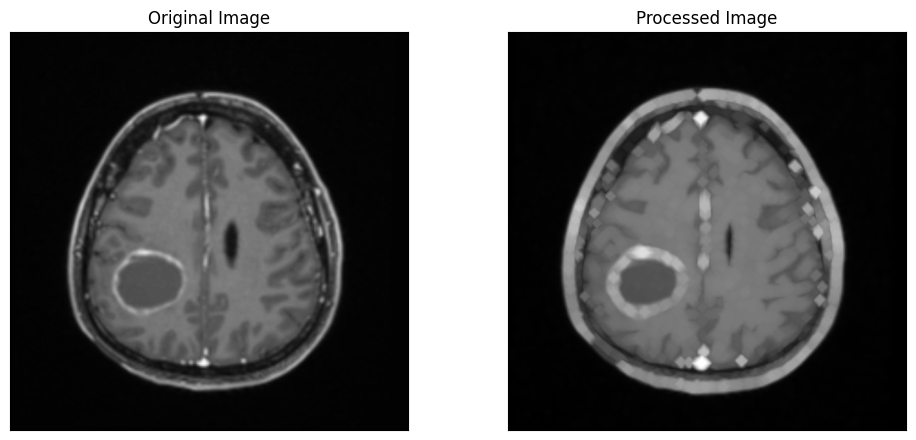

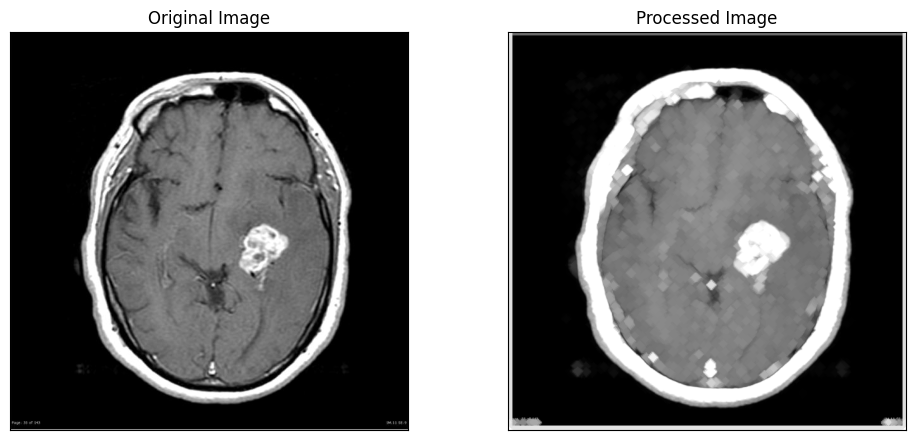

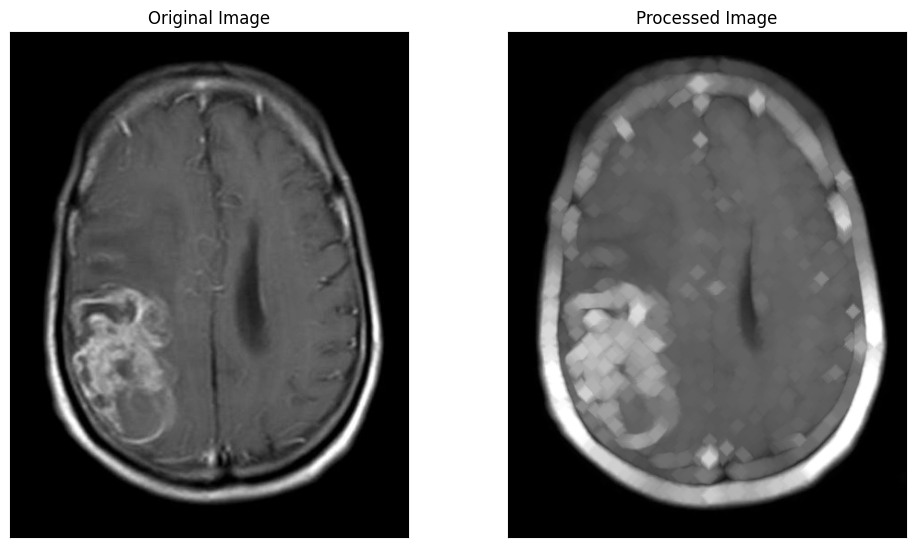

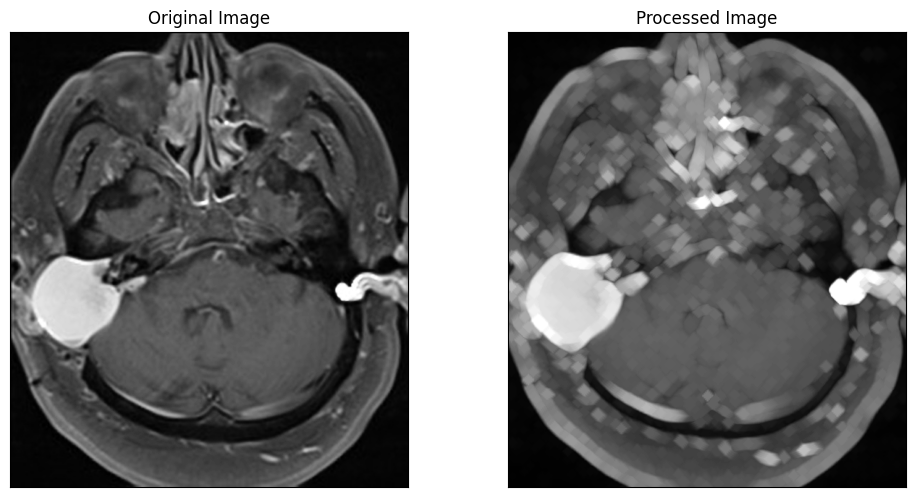

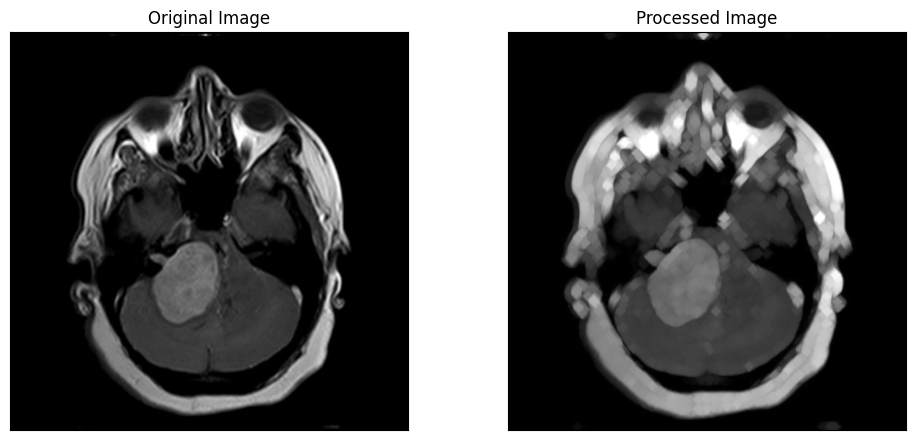

In [13]:
dilated = apply_fn_and_plot_vs_original(imgs, dilation)

#### Close
El método Close es una combinación de dilatación y erosión, que permite eliminar ruido de una imagen. Este método es muy útil para eliminar ruido de las imágenes, por lo que se espera que sea útil para eliminar ruido de las imágenes de resonancia magnética.

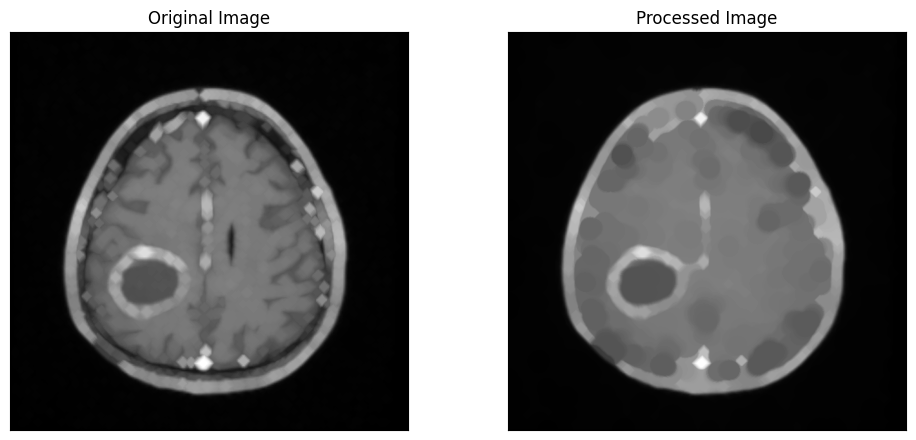

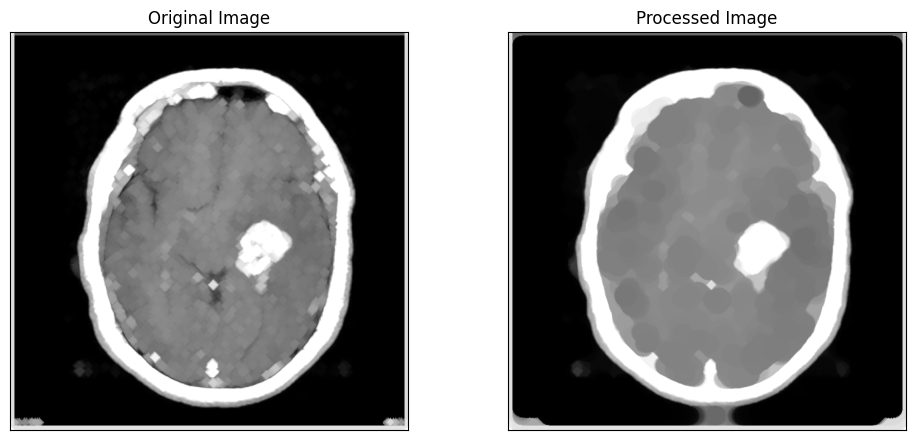

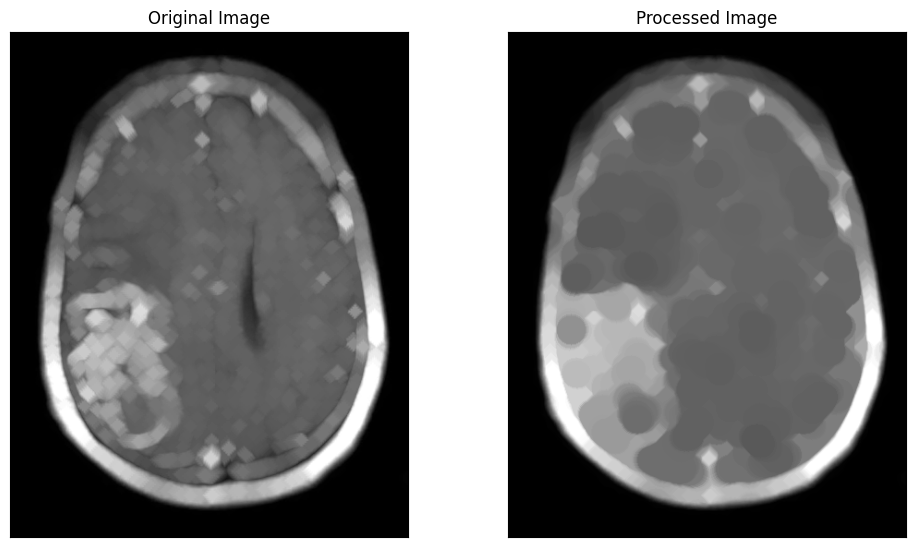

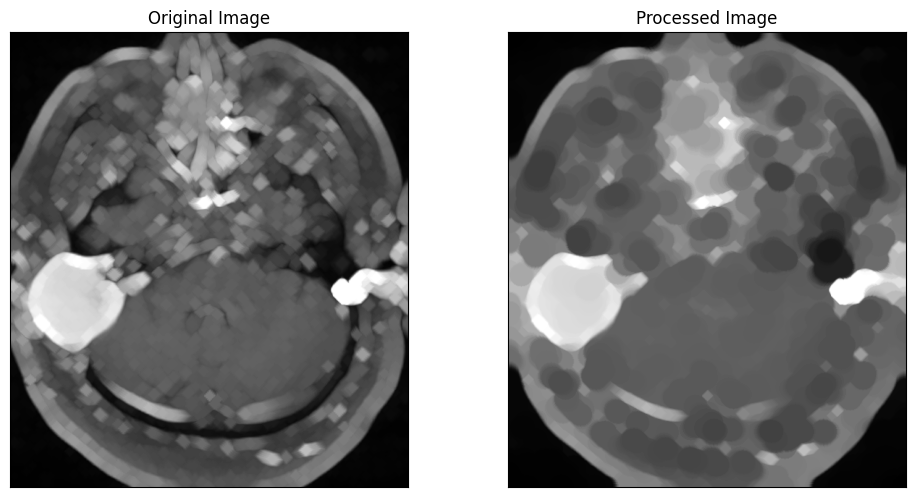

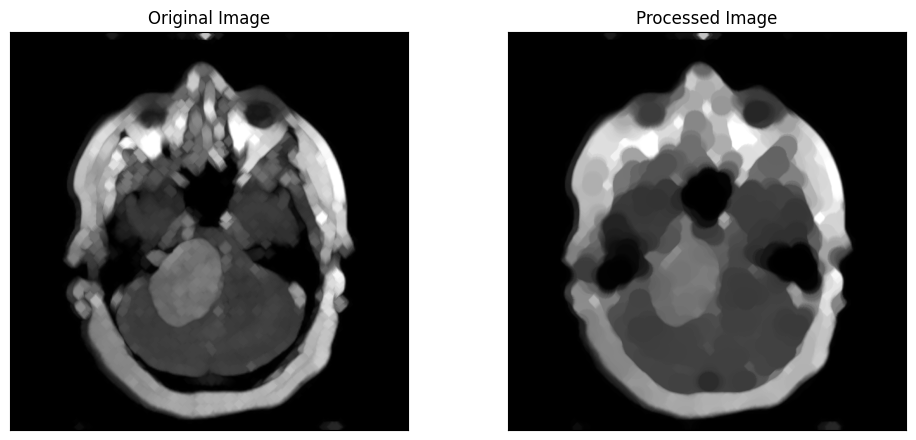

In [14]:
closed_after_dilation = apply_fn_and_plot_vs_original(dilated, close)

#### Canny
Para finalizar, se usa el método de detección de bordes de Canny. Teniendo los bordes de los objetos en una imagen, se puede resaltar la información de los tumores en las imágenes de resonancia magnética. Lo cual será útil para el entrenamiento de un modelo de clasificación.

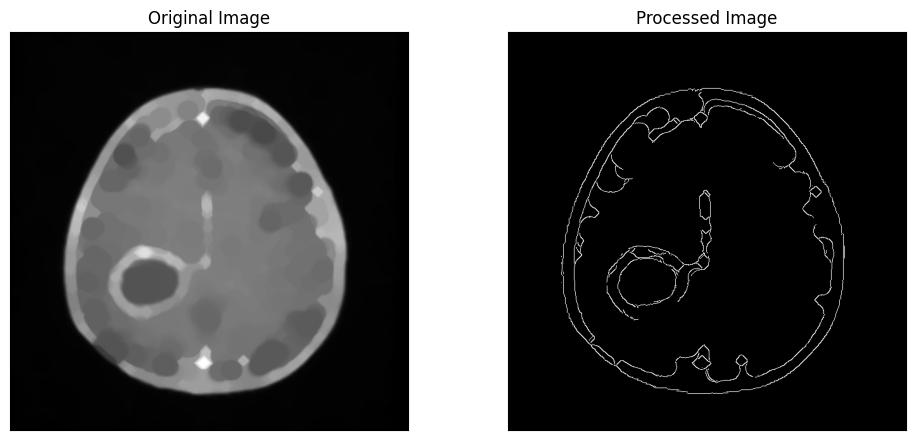

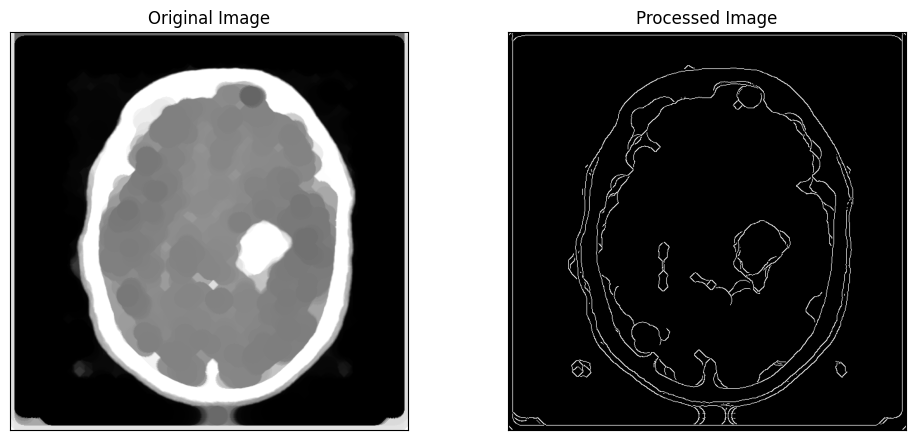

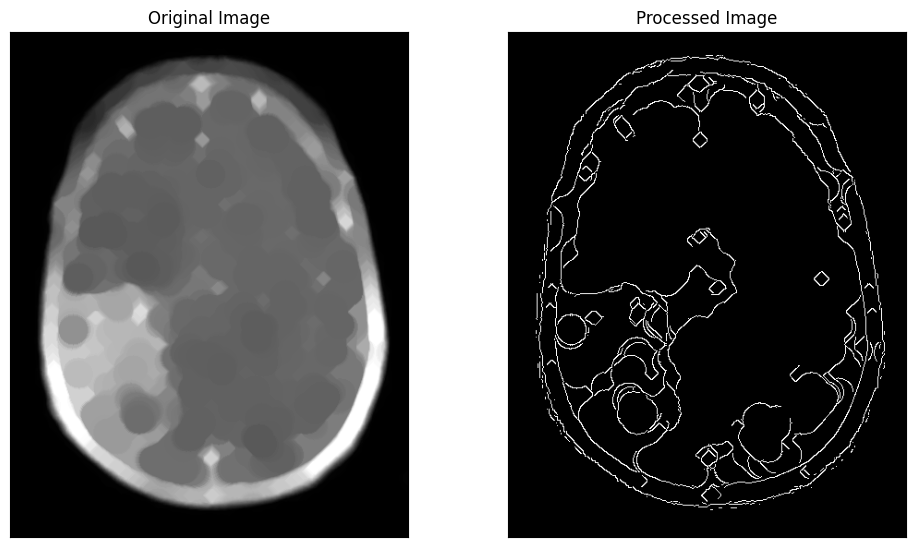

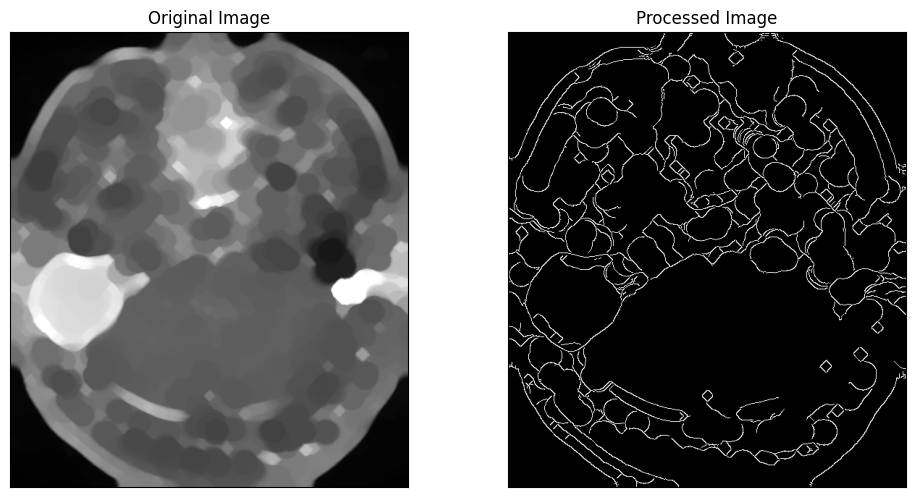

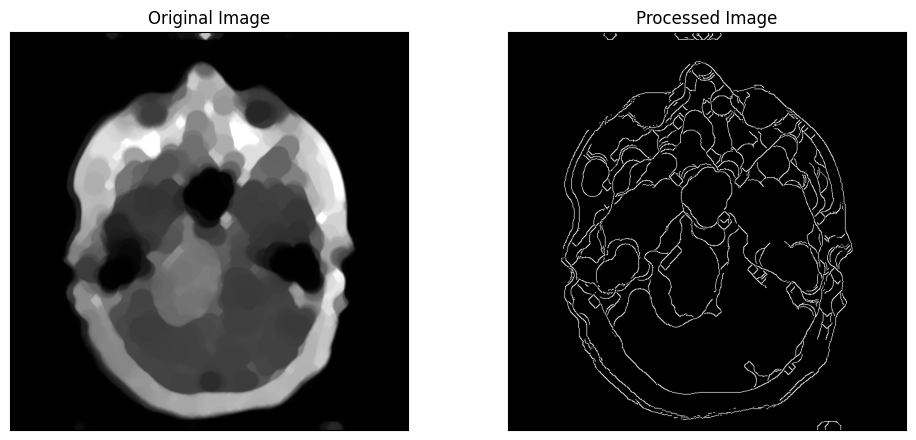

In [15]:
edges = apply_fn_and_plot_vs_original(closed_after_dilation, canny)

### Preprocesamiento completo
Para facilitar la comparación de cómo se veían las imágenes originales vs. las resultantes tras pre-procesarlas se deja el siguiente bloque:

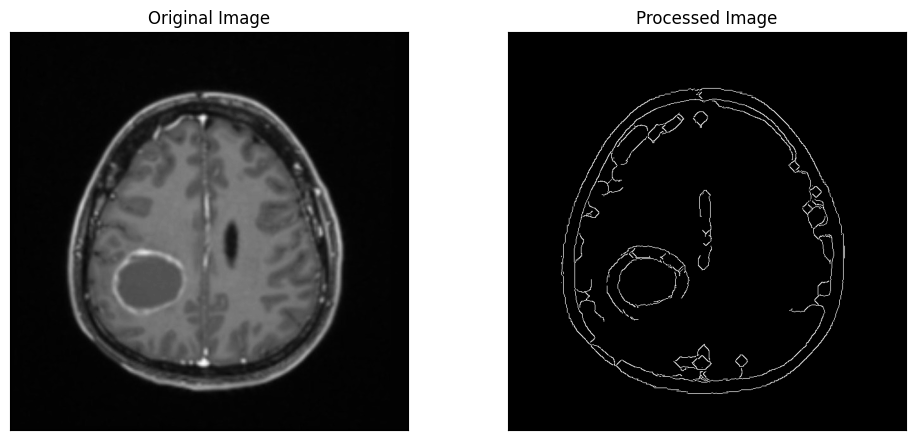

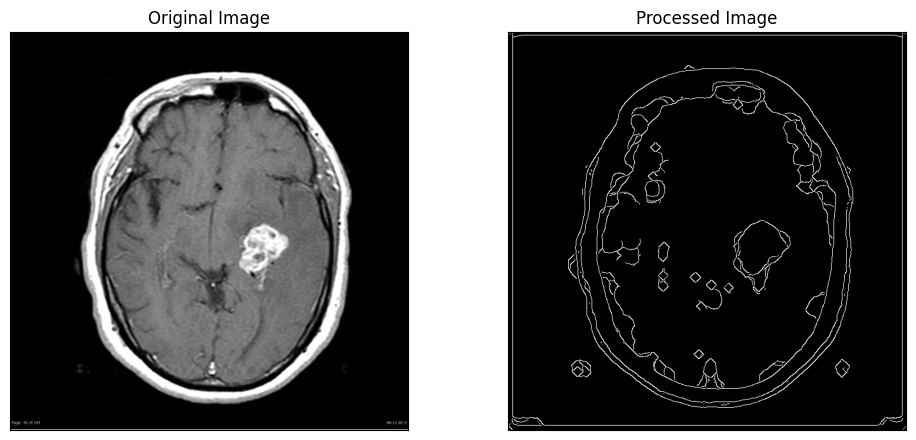

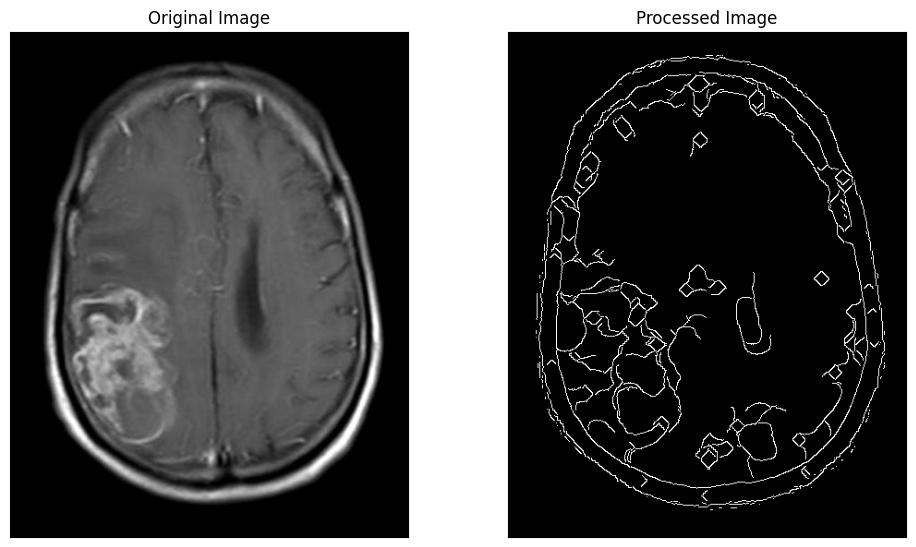

In [16]:
def all_preprocess(img):
    img = close(img)
    img = dilation(img)
    img = canny(img)
    return img

_ = apply_fn_and_plot_vs_original(imgs, all_preprocess)

### Conclusiones
Con los métodos de preprocesamiento escogidos se logró resaltar la información de los tumores en las imágenes de resonancia magnética. Sin embargo, se observó que dependiendo de la región del cerebro en la que se encuentre el tumor, se puede generar una gran cantidad de ruido en la imagen procesada. Por ejemplo, si un tumor se encuentra en las regiones bajas del cerebro, el pre-procesado de la imagen resaltará los ojos y la nariz de la misma manera que resalta el tumor. Consideramos que este problema es aceptable para la primera entrega del proyecto, ya que en próximos temas del curso se verán métodos para eliminar el ruido de las imágenes y clasificar mejor sus regiones.

Por otro lado, se observó que los métodos utilizados para procesar la imagen son adecuados para resaltar el tumor en la imagen eliminando una gran cantidad de ruido.